<a href="https://colab.research.google.com/github/Krushikkk/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Team
##### **Team Member 1 -** Krushik Kalavadiya
##### **Team Member 2 -** Kishan Hirapara


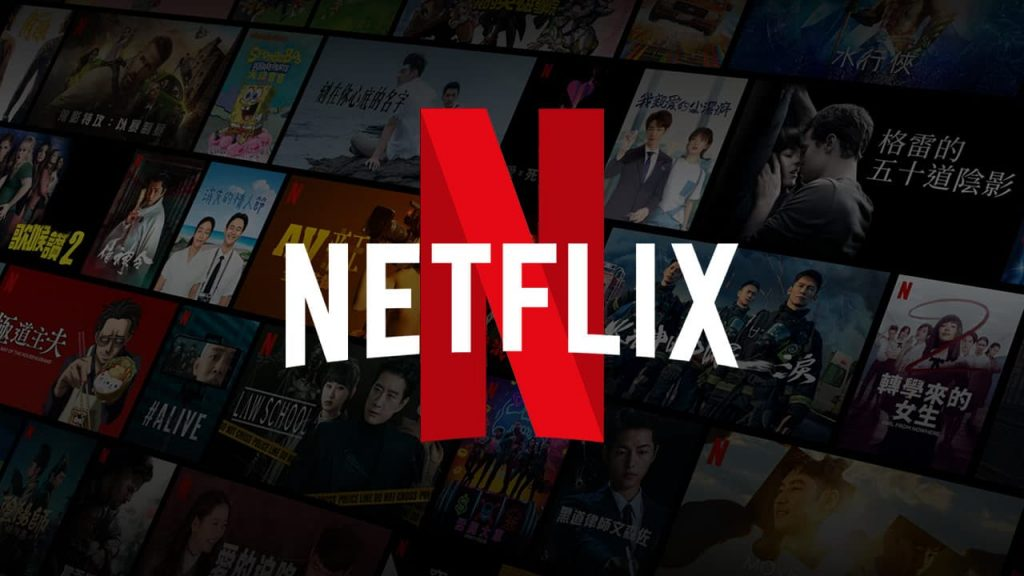

# **Project Summary -**

**Introduction:**

Netflix, one of the largest streaming platforms, has a vast library of movies and TV shows, which makes it difficult for users to find the content they are interested in. Clustering similar movies and TV shows based on their attributes such as genre, release year, rating, etc., can be a solution to this problem. This project aims to use unsupervised machine learning algorithms to cluster similar movies and TV shows and provide personalized recommendations to users.


**Objective:**

The main objective of this project is to create a clustering model that groups similar movies and TV shows based on their attributes without any prior knowledge of their labels or categories. The ultimate goal is to improve the user experience on the Netflix platform by providing personalized recommendations that match the user's interests.

**Approach:**

1. Know the dataset

2. Understanding Your Variables

3. Data wrangling

4. EDA

5. Hypothesis testing

6. Feature Engineering & Data Pre-processing

7. Clustering

   K-Means clustering

   Hierarchical clustering

8. Recommendation system 

9. Conclusion

Overall, this project will use unsupervised machine learning algorithms to cluster similar movies and TV shows and provide personalized recommendations to user

# **GitHub Link -**

https://github.com/Krushikkk/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


**Netflix, one of the leading streaming platforms, has a large collection of movies and TV shows. However, with such a vast library, it can be difficult for users to find content that they are interested in. The goal of this project is to use unsupervised machine learning techniques to cluster similar movies and TV shows based on their attributes such as genre, release year, rating, etc. This will enable Netflix to provide personalized recommendations to users based on their viewing history and preferences.**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid')

# Import libraries for NLP
import re
import unicodedata
import nltk  
nltk.download('stopwords')
nltk.download('punkt')  
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import model libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Import libraries For creating and customizing WordClouds
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Miscellaneous libraries
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter Submission File Unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Copying data to preserve orignal file
df = df_original.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

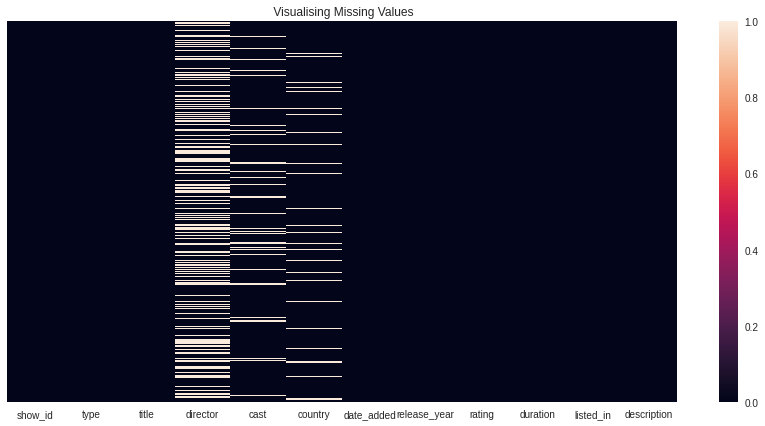

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), annot=False, yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

Our dataset consists of 7787 rows and 12 columns, and there are no duplicated values in it but some of the columns - director, cast, country, date_added, and rating contain null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include ='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

**show_id:** Unique ID for each TV Show or Movie

**type:** Indicates if the entry is a TV Show or Movie

**title:** The title of the TV Show or Movie

**director:** The director of the Movie or TV Show

**cast:** The cast of the Movie or TV Show

**country:** The country where the Movie or TV Show was produced

**date_added:** The date when the Movie or TV Show was added to Netflix

**release_year:** The year the Movie or TV Show was released

**rating:** The rating given to the Movie or TV Show

**duration:** The length of the Movie or TV Show

**listed_in:** The category or genre of the Movie or TV Show

**description:** A brief summary of the Movie or TV Show

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
# Value Counts of cast
df['cast'].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [ ]:
# Value Counts of 'listed_in' column
# Choosing the primary genre to simplify the analysis
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df['listed_in'].value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
T

In [ ]:
# Value Counts of rating
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.shape

(7777, 12)

In [ ]:
# Create a new features
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day 
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
# Checking for head after seperating date ,month,year
df[["date_added","year_added","month_added"]].head()

date_added  year_added  month_added
0 2020-08-14        2020            8
1 2016-12-23        2016           12
2 2018-12-20        2018           12
3 2017-11-16        2017           11
4 2020-01-01        2020            1

### What all manipulations have you done and insights you found?

We fill the null values in the 'director', 'cast', and 'country' columns with the string 'unknown' and we have filled the null values in the 'rating' column with the mode value. Finally, we have dropped the rows where the 'date_added' column has null values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

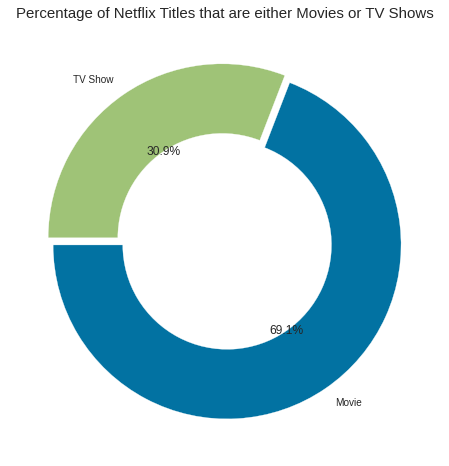

In [ ]:
# Chart - 1 visualization code
# Create a pie chart
plt.figure(figsize=(14,8))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows", fontsize = 15)
graph = plt.pie(df.type.value_counts(),
                explode=(0.025,0.025),
                labels=df.type.value_counts().index,
                autopct='%1.1f%%',
                startangle=180,
                wedgeprops={'width': 0.4}) 
plt.show()

##### 1. Why did you pick the specific chart?

To know about percentage of TV shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

There are about 69.1% movies and 30.9% TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix could gain insights into the types of content that are most popular with each group. This information could then be used to inform content acquisition and production decisions, as well as to personalize recommendations to individual users based on their viewing history and preferences.

#### Chart - 2

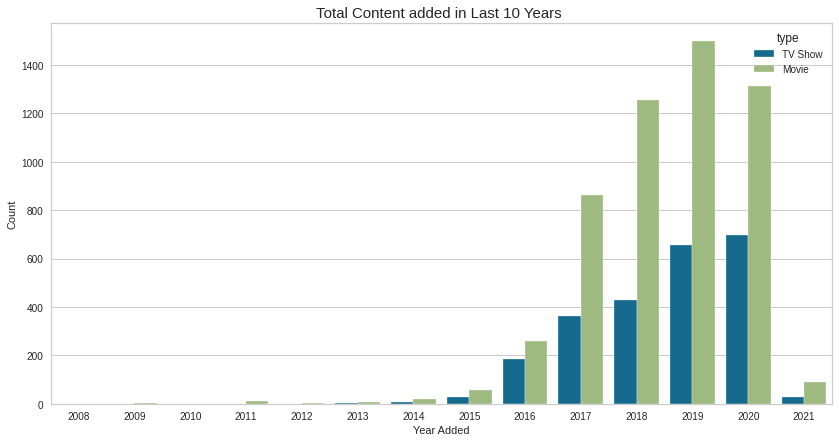

In [ ]:
# Chart - 2 visualization codE
# Storing type feature into individual variable name   
netflix_movies = df[df["type"]=="Movie"]
netflix_shows = df[df["type"]=="TV Show"]

# Total release for last 10 years
plt.figure(figsize=(14,7))
sns.countplot(x='year_added',hue='type',data=df)

plt.title('Total Content added in Last 10 Years ',fontsize = 15)  
plt.xlabel('Year Added') 
plt.ylabel('Count')   
plt.show()

##### 1. Why did you pick the specific chart?

To know last 10 year total yearly added movies and TV shows on netflix.

##### 2. What is/are the insight(s) found from the chart?

The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19. Growth in the number of movies on Netflix is much higher than tv shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The overall increase in the number of releases after 2015 suggests that the entertainment industry is experiencing growth, possibly due to increasing demand from consumers for more content. This could present opportunities for businesses in the industry to capitalize on this trend by investing in new projects and content.

Businesses in the entertainment industry should also be mindful of how external factors, such as the COVID-19 pandemic, can impact their operations and plan accordingly to mitigate any negative effects.

#### Chart - 3

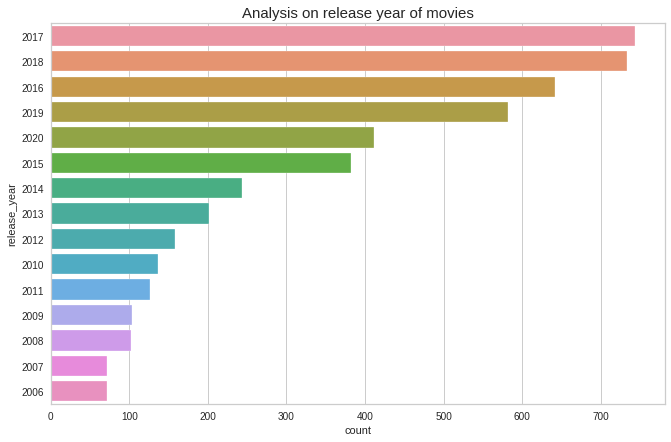

In [ ]:
# Chart - 3 visualization code
# Year wise analysis
plt.figure(figsize=(11,7))
ax = sns.countplot(y="release_year", data=netflix_movies, order=netflix_movies['release_year'].value_counts().index[0:15])
plt.title('Analysis on release year of movies', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

To analyse release year of movies.

##### 2. What is/are the insight(s) found from the chart?

Most of the Movies were released between 2016 to 2019.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The popularity of certain years for movie releases could also inform content acquisition and licensing strategies for streaming platforms like Netflix. For instance, if 2017 and 2018 were popular years for romantic comedies, then Netflix might want to acquire more rom-com titles to keep its viewers engaged.

By analyzing the success of different release years, Netflix could gain insights into audience preferences and content trends. This information could help inform the company's decision-making around content production and licensing, as well as marketing and promotional efforts.

#### Chart - 4

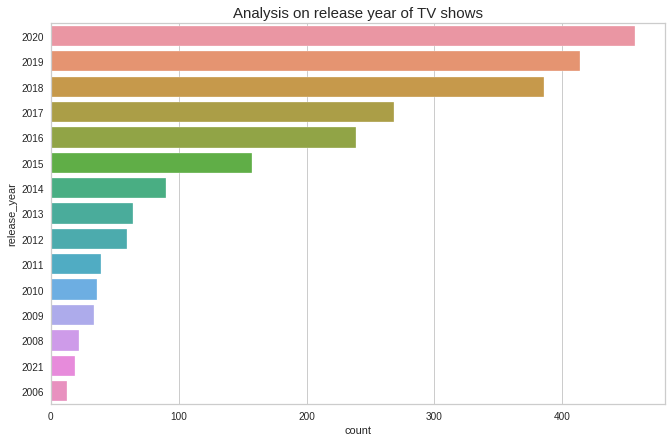

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(11,7))
ax = sns.countplot(y="release_year", data=netflix_shows, order=netflix_shows['release_year'].value_counts().index[0:15])
plt.title('Analysis on release year of TV shows', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

To analyse release year of TV shows.

##### 2. What is/are the insight(s) found from the chart?

Most of the TV Shows were released in 2020 followed by 2019 and 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The popularity of certain years for TV show releases could inform content acquisition and licensing strategies for streaming platforms like Netflix. For example, if 2020 was a popular year for science fiction shows, then Netflix might want to acquire more sci-fi titles to cater to audience demand.

#### Chart - 5

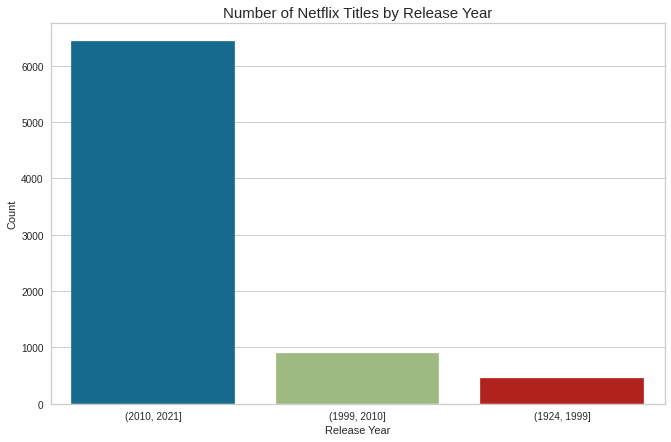

In [ ]:
# Chart - 5 visualization code
# Put the data into bins
release_yr_bin = pd.cut(df.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')

# Bin the release_year column
release_yr_bin = pd.cut(df.release_year, [1924, 1999, 2010, 2021])
release_yr_bin_counts = release_yr_bin.value_counts()

# Create a bar chart of the bin counts
plt.figure(figsize=(11, 7))
sns.barplot(x=release_yr_bin_counts.index.astype(str), y=release_yr_bin_counts.values)
plt.title('Number of Netflix Titles by Release Year', fontsize=15)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To know Number of Netflix Titles by Release Year.

##### 2. What is/are the insight(s) found from the chart?


82% of the content available was released between 2010 and 2021 and 17.28% of the content available was released before 2010.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

82% Content available was released between 2010 to 2021,This suggests that Netflix is primarily focusing on acquiring and producing more recent content, which may be more appealing to younger audiences.

#### Chart - 6

Text(0.5, 1.0, 'Most frequent days')

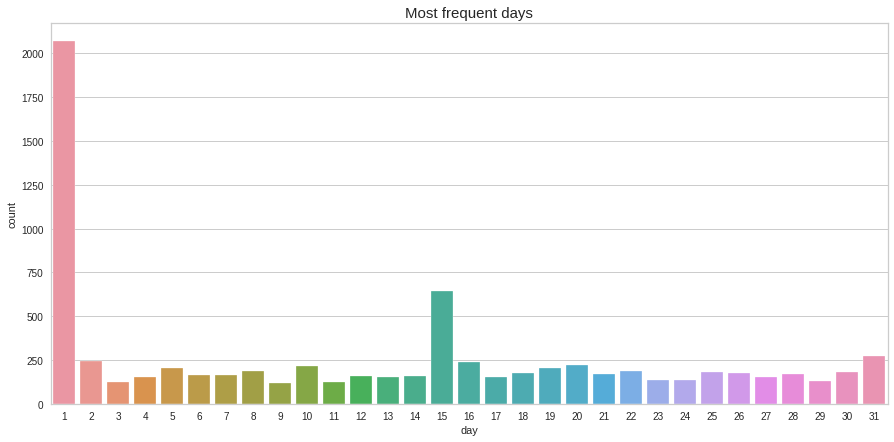

In [ ]:
# Chart - 6 visualization code
# Create dataframe to store day values and count
days_df = pd.DataFrame(df.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'count'}, inplace=True)

# Create a bar chart 
plt.figure(figsize=(15,7))
fig = sns.barplot(data = days_df, x="day", y="count")
plt.title('Most frequent days',fontsize = 15)

##### 1. Why did you pick the specific chart?

On which days of the months more netflix content have been release.

##### 2. What is/are the insight(s) found from the chart?

On the first of the month and On fortnight mostly netflix content released.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be useful for marketing and promotion efforts. By highlighting the fact that new content is often released on the first of the month and fortnightly, Netflix can attract viewers who are looking for fresh content to watch.

#### Chart - 7

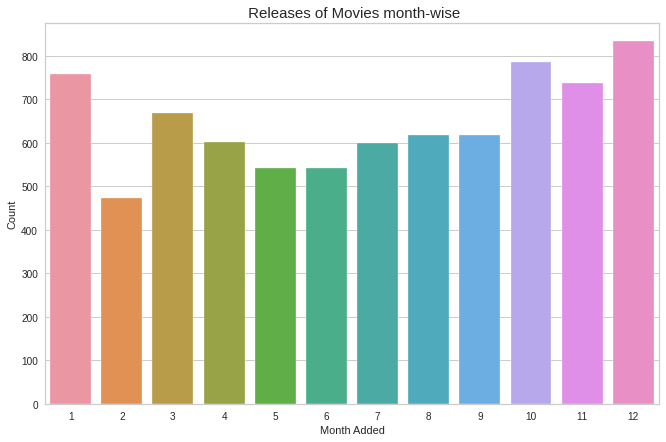

In [ ]:
# Chart - 7 visualization code
# Plot chart of Release of movies month-wise
plt.figure(figsize=(11,7))
sns.countplot(x='month_added',data=df)
plt.title(' Releases of Movies month-wise', fontsize = 15)  
plt.xlabel('Month Added') 
plt.ylabel('Count')    
plt.show()

##### 1. Why did you pick the specific chart?

To know the release frequency monthwise or in which season more contant have been release.

##### 2. What is/are the insight(s) found from the chart?

More of the content was released in holiday season - October, November, December and January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Movie producer have to keep in mind that best time for release the content is October, November, December and January. And also have to release upcoming content in trending seasons to get more viewer or more profit.

#### Chart - 8

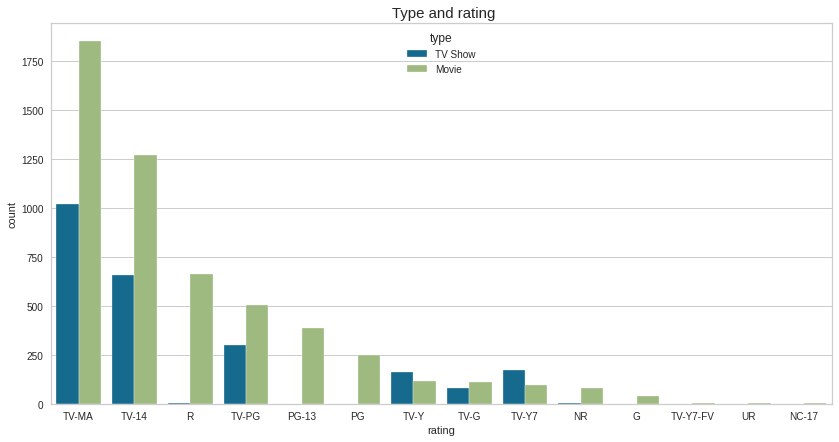

In [ ]:
# Chart - 8 visualization code
# Type of Rating
plt.figure(figsize=(14,7))
sns.countplot(x='rating',hue='type',data=df, order=netflix_movies['rating'].value_counts().index[0:15])
plt.title(' Type and rating', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

To know the count of movies and TV shows available on Netflix according to their rating.

##### 2. What is/are the insight(s) found from the chart?

It was found that the largest number of movies available on Netflix have a "TV-MA" rating, which is a rating assigned by the TV Parental Guidelines to a television program that is intended for mature audiences only. The second largest category is movies with a "TV-14" rating, which indicates that the content may not be suitable for children under 14 years of age. The third largest category is movies with an "R" rating, which is a rating assigned by the Motion Picture Association of America to indicate that the material may be unsuitable for children under the age of 17, and that adult supervision is advised. It is worth noting that the "TV-MA" rating is the most common rating among the movies available on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information that the largest number of movies available on Netflix have a "TV-MA" rating, followed by "TV-14" and "R" ratings, could be useful for businesses in several ways:

Content acquisition strategy: Companies that are involved in content acquisition, such as production houses, could use this information to tailor their content acquisition strategy to meet the demand for different types of content. They could focus on producing or acquiring more content that fits into the most popular rating categories on Netflix.

Targeted advertising: Advertisers could use this information to create targeted advertising campaigns that are focused on the most popular rating categories. For example, they could create ads that are designed to appeal to audiences who enjoy watching "TV-MA" rated content.

#### Chart - 9

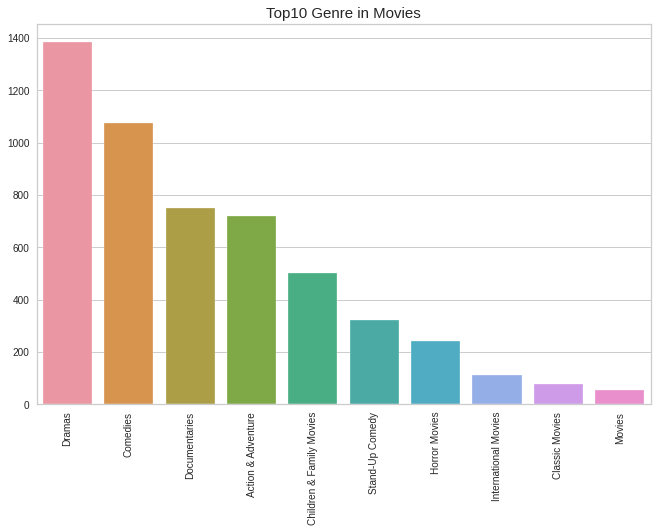

In [ ]:
# Chart - 9 visualization code
# Top 10 Genre in movies
plt.figure(figsize=(11,7))
sns.barplot(x = netflix_movies["listed_in"].value_counts().head(10).index,
            y = netflix_movies["listed_in"].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.title('Top10 Genre in Movies', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

To know top 10 Genre in movies.


##### 2. What is/are the insight(s) found from the chart?

From the chart we can say that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on viewership patterns, it may be possible to identify trends and preferences among viewers that could inform business decisions related to content acquisition, production, and marketing.

#### Chart - 10

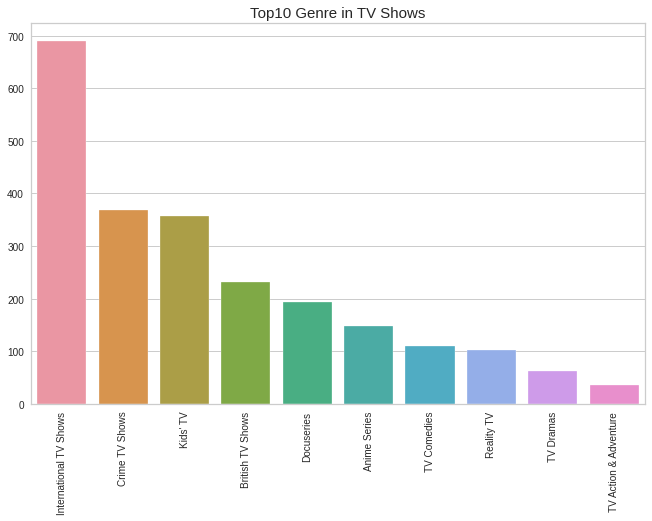

In [ ]:
# Chart - 10 visualization code
# Top10 Genre in TV Shows
plt.figure(figsize=(11,7))
sns.barplot(x = netflix_shows["listed_in"].value_counts().head(10).index,
            y = netflix_shows["listed_in"].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.title('Top10 Genre in TV Shows',fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

To know top 10 Genre in TV shows.

##### 2. What is/are the insight(s) found from the chart?

International TV shows in top followed by Crime TV shows and Kid's TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on viewership patterns, it may be possible to identify trends and preferences among viewers that could inform business decisions related to content acquisition, production, and marketing.

#### Chart - 11

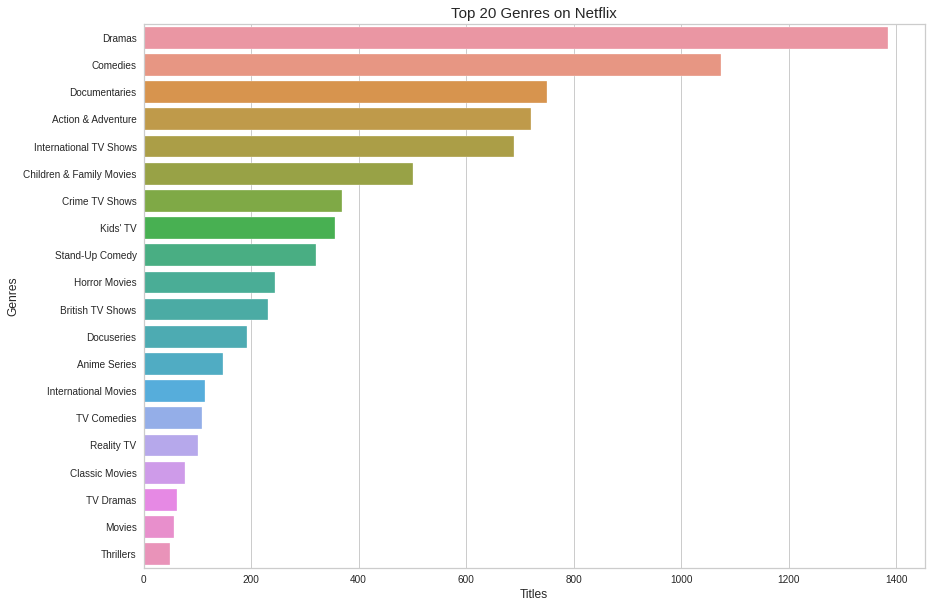

In [ ]:
# Chart - 11 visualization code
# Top 20 Genres on Netflix
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(14,10))
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix',fontsize = 15)
plt.xlabel('Titles',fontsize = 12)
plt.ylabel('Genres', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

To know Top Genre among all Genre on netflix.

##### 2. What is/are the insight(s) found from the chart?

Dramas,Comedies,Documentaries and Action&Adventure Movies Genre are on top followed by International TV Shows Genre.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The analysis finds that dramas are the most popular genre, Netflix can invest more in producing and licensing dramas to attract and retain viewers. Similarly, if comedies are found to be popular, Netflix can focus on acquiring more comedy titles to appeal to its audience.

#### Chart - 12

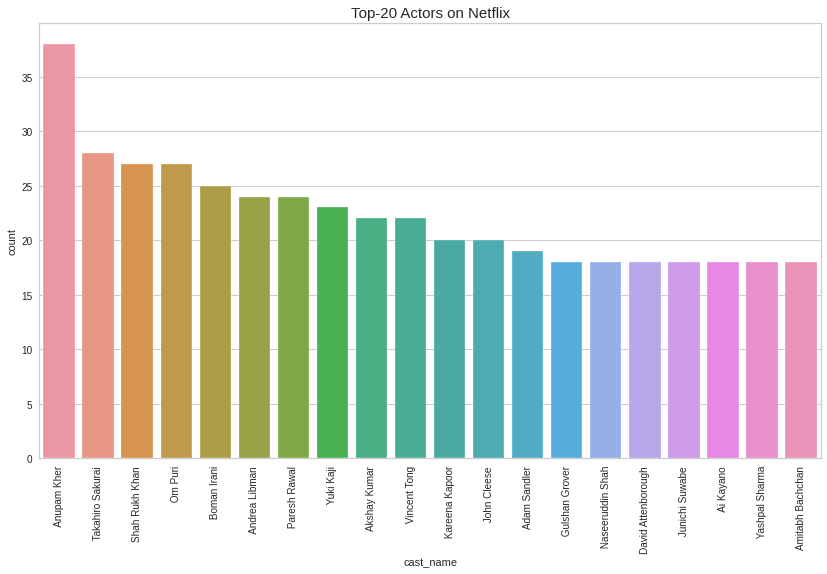

In [ ]:
# Chart - 12 visualization code
# Top 20 actors netflix
df['cast'] = df['cast'].astype(str)
df['cast_name'] =df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(14,8))
sns.barplot(x='cast_name',y='count',data=df_cast_count)
plt.title('Top-20 Actors on Netflix', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To know the top actor on netflix based on titels.

##### 2. What is/are the insight(s) found from the chart?

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be useful for marketing and promotion efforts. By highlighting Anupam Kher's popularity and other top actors popularity on Netflix, the platform may be able to attract new subscribers who are fans of his work.

#### Chart - 13

In [ ]:
# Showing duration rows head
netflix_movies["duration"].head()

1     93 min
2     78 min
3     80 min
4    123 min
6     95 min
Name: duration, dtype: object

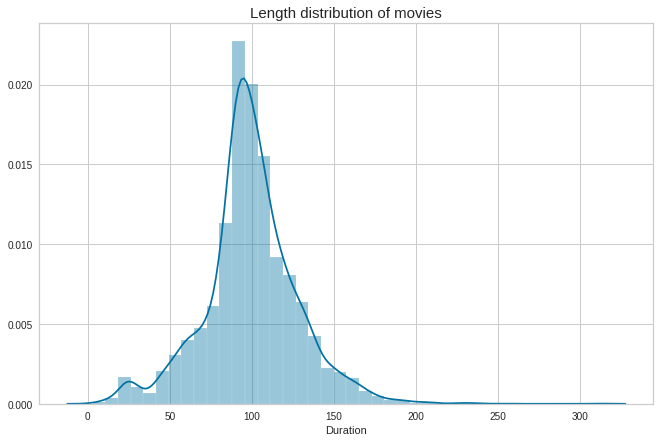

In [ ]:
# Chart - 13 visualization code
# Duration
netflix_movies['duration']=netflix_movies["duration"].str.replace('min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)

# Length distribution of movies
movie_data = df[df['type']=='Movie']
plt.figure(figsize=(11,7))
sns.distplot(netflix_movies['duration'], bins=40).set(ylabel=None)
plt.title('Length distribution of movies',fontsize = 15)
plt.xlabel('Duration')
plt.show()

##### 1. Why did you pick the specific chart?

To know the average duration of Movies in netflix.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies lasts for 90 to 120 minutes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can help identify the most popular movie lengths on the platform. By analyzing the duration of movies that are popular with Netflix viewers, it may be possible to identify patterns and preferences that can inform content acquisition and production decisions.

Secondly, this information can help guide programming decisions. If most movies on Netflix are between 90 and 120 minutes long, the platform may consider scheduling movies with similar durations during peak viewing times to maximize viewer engagement.

#### Chart - 14 

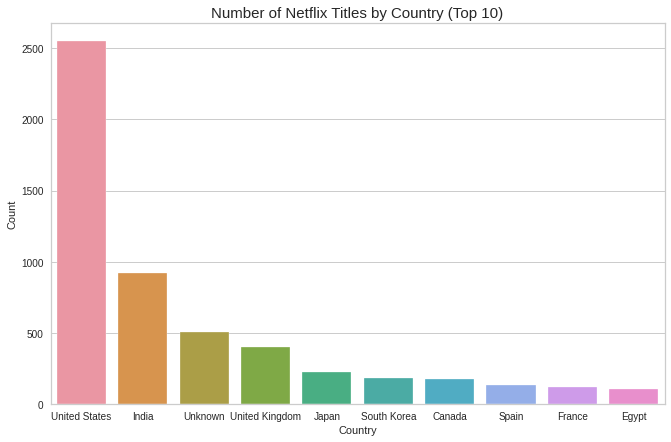

In [ ]:
# Chart - 14 visualization code
# Get the top 10 countries by number of Netflix titles
count_countries = pd.DataFrame(df['country'].value_counts()[:10]).reset_index()
count_countries.rename(columns={'index': 'country', 'country': 'count'}, inplace=True)

# Create a bar chart of the country counts
plt.figure(figsize=(11, 7))
sns.barplot(x='country', y='count', data=count_countries)
plt.title('Number of Netflix Titles by Country (Top 10)',fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To know the number of netflix titels by country.

##### 2. What is/are the insight(s) found from the chart?

Top netflix titels are of United States among all country followed by the India.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can help identify the most popular countries for producing content that resonates with Netflix viewers. By analyzing the types of content that are popular in these countries, it may be possible to identify common themes, genres, or production styles that appeal to Netflix viewers worldwide.

#### Chart - 15 - Correlation Heatmap

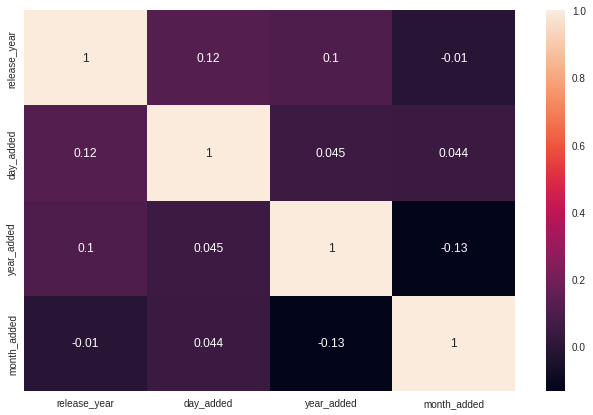

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

To check the correlation among the different features.

##### 2. What is/are the insight(s) found from the chart?

There are no strong correlation have been found among the features.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The number of movie releases on Netflix is greater than the number of TV show releases on Netflix.
2. The number of movie releases on Netflix per year is less than 750.
3. More than half of the content available on Netflix consists of TV-MA rated movies or TV shows.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis(Ho): The number of movie releases on Netflix is less than or equal to the number of TV show releases on Netflix.

Alternative hypothesis(H1): The number of movie releases on Netflix is greater than the number of TV show releases on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

# Count the number of movie and TV show releases on Netflix
num_movies = df[df['type'] == 'Movie'].shape[0]
num_tvshows = df[df['type'] == 'TV Show'].shape[0]

# Compute the proportion of movie and TV show releases on Netflix
prop_movies = num_movies / (num_movies + num_tvshows)
prop_tvshows = num_tvshows / (num_movies + num_tvshows)

# Set the null hypothesis proportion
p_null = prop_tvshows

# Perform the one-sided z-test to compare the proportions
count = num_movies
nobs = num_movies + num_tvshows
stat, p_val = proportions_ztest(count, nobs, p_null, alternative='larger')

# Print the results
print("Z-statistic:", stat)
print("p-value:", p_val)

# Determine if the null hypothesis is rejected or not
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. The number of movie releases on Netflix is greater than the number of TV show releases on Netflix.")
else:
    print("Fail to reject the null hypothesis. The number of movie releases on Netflix is less than or equal to the number of TV show releases on Netflix.")

Z-statistic: 73.08180161087193
p-value: 0.0
Reject the null hypothesis. The number of movie releases on Netflix is greater than the number of TV show releases on Netflix.


##### Which statistical test have you done to obtain P-Value?

We used the Z-test to obtain the p-value.

##### Why did you choose the specific statistical test?

We used the Z-test to compare the proportion of movies and TV shows in the Netflix dataset. By using the Z-test in this context, we were able to determine whether the proportion of movies and TV shows in the Netflix dataset differed significantly, and thus draw conclusions about the content available on the platform.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (Ho): The number of movie releases on Netflix per year is greater than or equal to than 750.

Alternative hypothesis (H1): The number of movie releases on Netflix per year is less than 750.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp

# Extract the year_added column and count the number of movies per year
movies_per_year = df[df['type'] == 'Movie'].groupby('year_added')['show_id'].count()

# Conduct one-sample t-test
t_stat, p_value = ttest_1samp(movies_per_year, 750)

# Print the test statistic and p-value
print('Test statistic:', t_stat)
print('P-value:', p_value/2) # Divide p-value by 2 for a one-tailed test

# Determine if the null hypothesis is rejected or not
alpha = 0.05
if p_val/2 < alpha:
    print("Reject the null hypothesis. The number of movie releases on Netflix per year is less than 750.")
else:
    print("Fail to reject the null hypothesis.  The number of movie releases on Netflix per year is greater than or equal to than 750.")

Test statistic: -2.3815001013357753
P-value: 0.016607335565698076
Reject the null hypothesis. The number of movie releases on Netflix per year is less than 750.


##### Which statistical test have you done to obtain P-Value?

We used a one sample t-test to obtain the p-value.

##### Why did you choose the specific statistical test?

We chose the one-sample t-test because we want to test the hypothesis that the number of movie releases on Netflix per year is less than 750.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (Ho): Less than or equal to 50% of the content available on Netflix consists of TV-MA rated movies or TV shows.

Alternative hypothesis (H1): More than 50% of the content available on Netflix consists of TV-MA rated movies or TV shows.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

# Calculate the proportion of TV-MA rated movies or TV shows in the dataset
prop_tvma = len(df[df['rating'] == 'TV-MA']) / len(df)

# Set the null hypothesis proportion to 0.5
null_prop = 0.5

# Perform the one-sample proportion test
z_stat, p_value = proportions_ztest(prop_tvma * len(df), len(df), null_prop)

# Print the results
print("Z-statistic:",z_stat)
print("p-value:", p_val)

# Print the test result
if p_value < 0.05:
    print("Reject null hypothesis. More than 50% of the content available on Netflix consists of TV-MA rated movies or TV shows.")
else:
    print("Fail to reject null hypothesis. Less than or equal to 50% of the content available on Netflix consists of TV-MA rated movies or TV shows.")

Z-statistic: -23.984627006278437
p-value: 0.0
Reject null hypothesis. More than 50% of the content available on Netflix consists of TV-MA rated movies or TV shows.


##### Which statistical test have you done to obtain P-Value?

We used the Z-test to obtain the p-value.

##### Why did you choose the specific statistical test?

We chose the one-sample proportion test because our objective is to determine whether the proportion of TV-MA rated movies or TV shows in the content available on Netflix is greater than 50%.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

We already done.

### 2. Handling Outliers

We don't required outlier treatment because we don't have variables with extreme outlier.

### 3. Categorical Encoding

we don't used any categorical encoding techniques in our analysis of the this data as it did not involve any categorical variables. Therefore, there was no need to apply any encoding techniques to convert categorical variables to numerical format for further analysis.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# We will be using text columns to create clusters for our data.

cluster_df = df[['title']]
df[['description','listed_in','director','cast','country']] = df[['description','listed_in','director','cast','country']].astype(str)
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'])
cluster_df.set_index('title', inplace = True)
cluster_df.head()

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Define a function to expand contractions
def expand_contractions(text):
    contraction_patterns = [(r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'that\'s', 'that is'), (r'i\'m', 'i am'),
                            (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                            (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'),
                            (r'(\w+)\'d', '\g<1> would'), (r'daughter\'s', 'daughter is'),
                            (r'son\'s', 'son is'), (r'(\w+)ic', '\g<1>')]
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

In [ ]:
# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(expand_contractions)
cluster_df.head()

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexo City,...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalypt world, rag-doll robots hide...
21     A brilliant group of students become card-coun...

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Define the function to apply lower casing
def lowercase_text(text):
    return text.lower()

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lowercase_text)
cluster_df.head()

cluster_data
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexo city,...
23:59  when an army recruit is found dead, his fellow...
9      in a postapocalypt world, rag-doll robots hide...
21     a brilliant group of students become card-coun...

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Define the function to remove punctuations
def remove_punctuation(text):
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head() 

cluster_data
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexo city ...
23:59  when an army recruit is found dead his fellow ...
9      in a postapocalypt world ragdoll robots hide i...
21     a brilliant group of students become cardcount...

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Find rows with links in cluster_data
link_rows = cluster_df[cluster_df['cluster_data'].str.contains(r'http|www')]
top_5_link_rows = link_rows.sort_values(by='cluster_data', ascending=False).head(5)
top_5_link_rows

Empty DataFrame
Columns: [cluster_data]
Index: []

In [ ]:
# Remove URLs & Remove words and digits contain digits
# Define a function to remove words which containing digits
def remove_digits(text):
    text = re.sub(r'\w*\d\w*', '', text).strip()
    return text

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_digits)
cluster_df.head()  

cluster_data
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexo city ...
23:59  when an army recruit is found dead his fellow ...
9      in a postapocalypt world ragdoll robots hide i...
21     a brilliant group of students become cardcount...

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Define a function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_stopwords)
cluster_df.head()    

cluster_data
title                                                   
3%     future elite inhabit island paradise far crowd...
7:19   devastating earthquake hits mexo city trapped ...
23:59  army recruit found dead fellow soldiers forced...
9      postapocalypt world ragdoll robots hide fear d...
21     brilliant group students become cardcounting e...

#### 6. Tokenization

In [ ]:
# Tokenization
# Define a function for tokenization
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(tokenize_text)
cluster_df.head()       

cluster_data
title                                                   
3%     [future, elite, inhabit, island, paradise, far...
7:19   [devastating, earthquake, hits, mexo, city, tr...
23:59  [army, recruit, found, dead, fellow, soldiers,...
9      [postapocalypt, world, ragdoll, robots, hide, ...
21     [brilliant, group, students, become, cardcount...

#### 7. Text Normalization

In [ ]:
# Define a function to remove non-ascii characters
def remove_non_ascii(tokens):
    new_tokens = []
    for token in tokens:
        new_token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_tokens.append(new_token)
    return new_tokens

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: remove_non_ascii(x))
cluster_df.head(10)  

cluster_data
title                                                   
3%     [future, elite, inhabit, island, paradise, far...
7:19   [devastating, earthquake, hits, mexo, city, tr...
23:59  [army, recruit, found, dead, fellow, soldiers,...
9      [postapocalypt, world, ragdoll, robots, hide, ...
21     [brilliant, group, students, become, cardcount...
46     [genets, professor, experiments, treatment, co...
122    [awful, accident, couple, admitted, grisly, ho...
187    [one, high, school, students, attacks, dedated...
706    [doctor, goes, missing, psychiatrist, wife, tr...
1920   [architect, wife, move, castle, slated, become...

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Define a function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: lemmatize_tokens(x))
cluster_df.head()   

cluster_data
title                                                   
3%     [future, elite, inhabit, island, paradise, far...
7:19   [devastating, earthquake, hit, mexo, city, tra...
23:59  [army, recruit, found, dead, fellow, soldier, ...
9      [postapocalypt, world, ragdoll, robot, hide, f...
21     [brilliant, group, student, become, cardcounti...

##### Which text normalization technique have you used and why?

we used lemmatization because lemmatization produces a valid base word that has a meaning, whereas stemming produces an arbitrary base word that may not have any meaning on its own. It produces more accurate results in applications such as question-answering systems, and sentiment analysis.

#### 8. Text Vectorization

In [ ]:
# Vectorizing Text
# Define a function to tokenize the text
def identity_tokenizer(text):
    return text

# Initialize a TfidfVectorizer object
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features=20000)

# Fit the vectorizer to the text data in the cluster_data column
vectorizer.fit_transform(cluster_df['cluster_data'])

# Get the vocabulary (unique words in the corpus)
vocabulary = vectorizer.get_feature_names_out()
print(vocabulary)

# Transform the text data into a TF-IDF representation
X = vectorizer.transform(cluster_df['cluster_data']).toarray()
print(X)

['' 'aadarsh' 'aaditi' ... 'zygmunt' 'zylberberg' 'zylka']
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.1733426 0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


##### Which text vectorization technique have you used and why?

We used is TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. We have used this technique because it combines both the Term Frequency and Inverse Document Frequency concepts. The main reason for using TF-IDF is to convert the text data into numerical data which can be used as input to various machine learning algorithms for text classification. In TF-IDF, the importance of each word in a document is determined by both its frequency (Term Frequency) and its rarity in the entire corpus (Inverse Document Frequency). This helps in capturing the importance of each word in the document and helps in creating a more meaningful representation of the text data.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, we have text data, and after applying natural language processing techniques, we obtain high-dimensional features. However, high-dimensional data often suffers from the curse of dimensionality. This phenomenon refers to the fact that as the number of dimensions increases, the amount of data required to train a model accurately increases exponentially. Consequently, analyzing and visualizing the data becomes more challenging, and building models that can generalize well also becomes difficult.



In [ ]:
# DImensionality Reduction
pca = PCA()
pca.fit(X)

PCA()

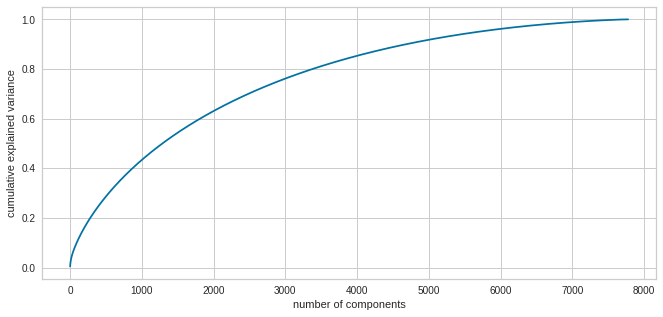

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(11,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Observation :**
1. We can see from the above plot almost 95% of the variance can be explained by 5000 components.
2. Since choosing 5000 could be tricky we will set the value to be 95%.

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X)
X_transformed = pca_tuned.transform(X)
X_transformed.shape

(7777, 5691)

In [ ]:
X_transformed

array([[ 3.45912862e-02,  5.62302512e-02, -4.35937673e-03, ...,
         4.35441739e-03,  1.70483673e-02, -7.06925776e-03],
       [-3.36646825e-02,  1.07521297e-02,  1.75357822e-02, ...,
        -7.27378193e-03, -9.85205632e-03, -5.34951500e-03],
       [-3.55777263e-02,  1.96310541e-02, -5.41129353e-02, ...,
         8.65124630e-03, -3.97838964e-03, -3.46352141e-03],
       ...,
       [ 1.46032837e-01, -3.79165750e-02,  1.14674335e-01, ...,
        -1.56766576e-03, -4.07173369e-03, -4.93710276e-03],
       [ 5.23996645e-02,  6.77633183e-02,  5.40173856e-03, ...,
         2.92236745e-03,  7.02939865e-03,  6.32172994e-03],
       [ 1.86519045e-01, -1.97108258e-01,  1.46927588e-01, ...,
        -1.70765917e-04,  6.08149823e-03,  2.94428391e-04]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used Principal Component Analysis (PCA) for dimensionality reduction because high-dimensional data frequently suffers from the curse of dimensionality.

## ***7. ML Model Implementation***

### ML Model - 1

###**K-Means Clustering**

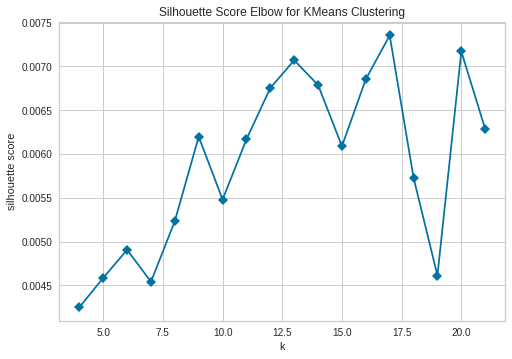

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Plot silhoutte score elbow for kmeans clustering
model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
# Define a function for silhouette_score_analysis
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)
      # Fit the training data to the visualizer   
      visualizer.fit(X_transformed) 
      visualizer.poof() 

For n_clusters = 2, silhouette score is 0.0029456851169171413


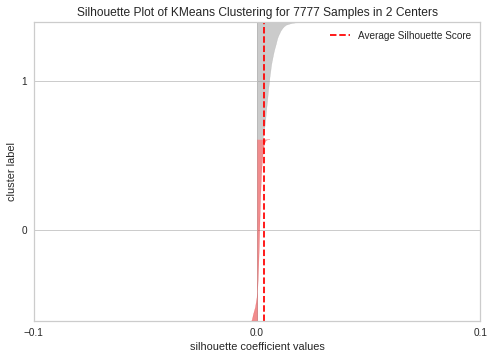

For n_clusters = 3, silhouette score is 0.00299735651398861


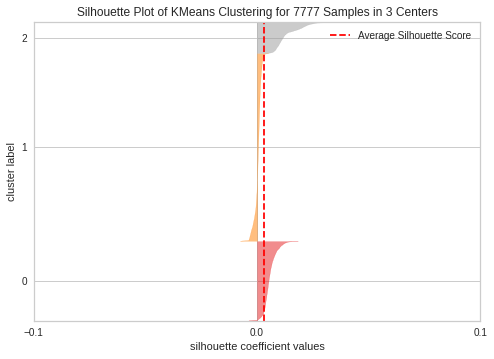

For n_clusters = 4, silhouette score is 0.004251286821356872


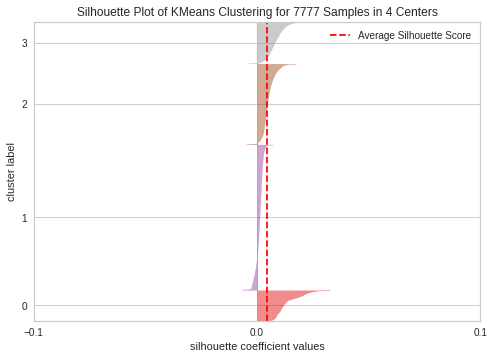

For n_clusters = 5, silhouette score is 0.0045859247008189314


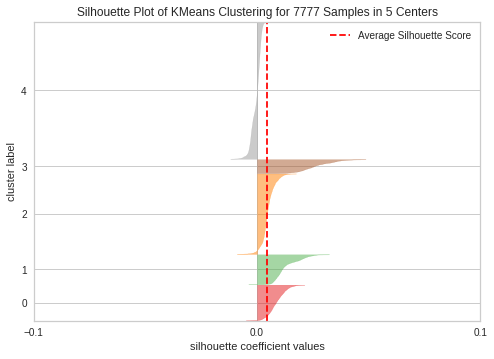

For n_clusters = 6, silhouette score is 0.004906811074545846


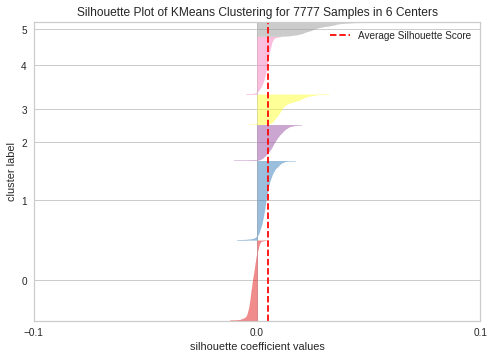

For n_clusters = 7, silhouette score is 0.004542091223727297


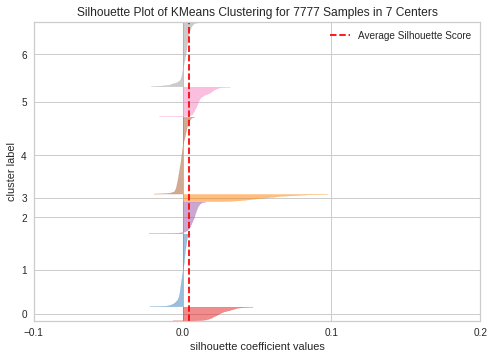

For n_clusters = 8, silhouette score is 0.005235703573441203


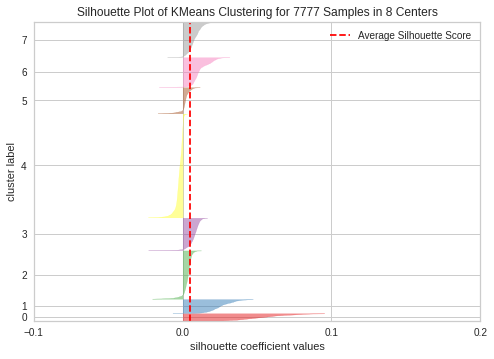

For n_clusters = 9, silhouette score is 0.006198070859799024


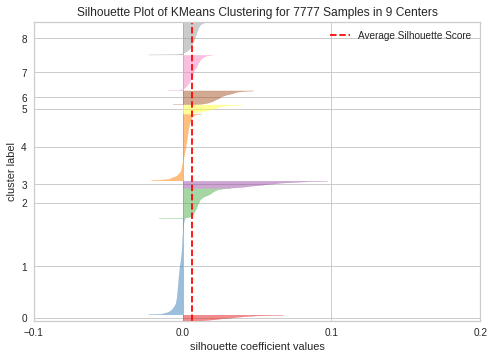

For n_clusters = 10, silhouette score is 0.005480726596253528


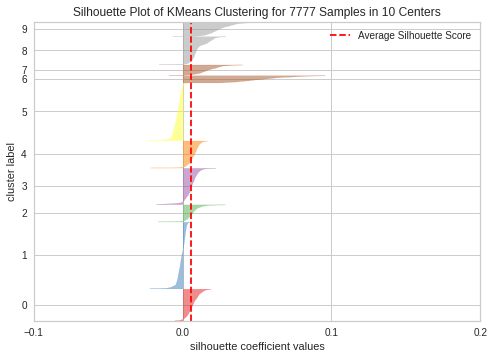

For n_clusters = 11, silhouette score is 0.006168342798936972


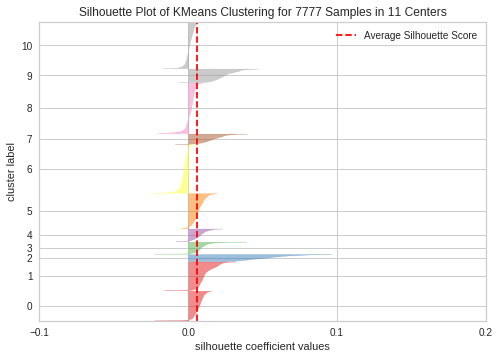

For n_clusters = 12, silhouette score is 0.006754820512846977


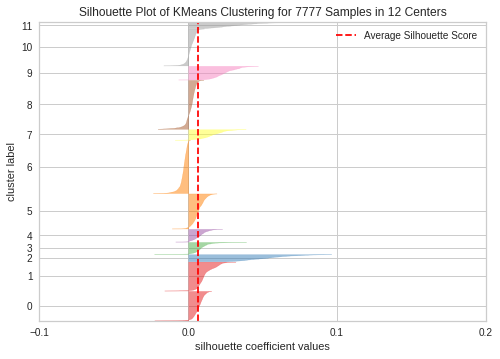

For n_clusters = 13, silhouette score is 0.007070803196302586


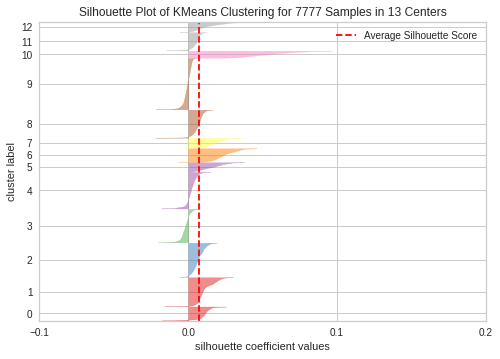

For n_clusters = 14, silhouette score is 0.006787955113741422


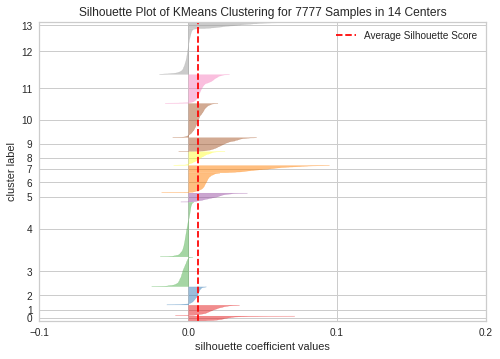

For n_clusters = 15, silhouette score is 0.006090045576046198


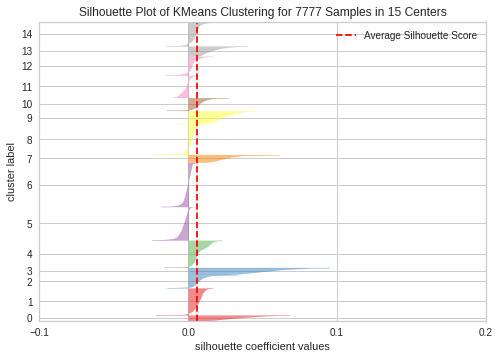

For n_clusters = 16, silhouette score is 0.00685485738862485


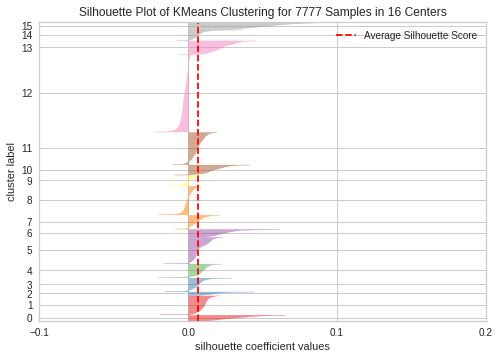

For n_clusters = 17, silhouette score is 0.007354787818860514


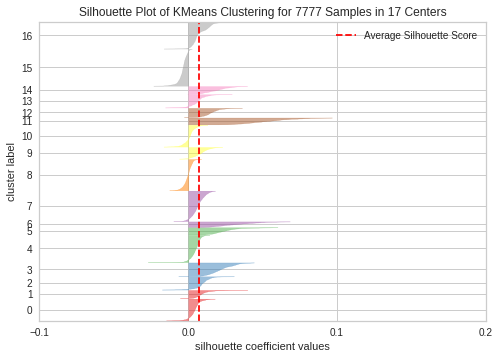

For n_clusters = 18, silhouette score is 0.005728629103086064


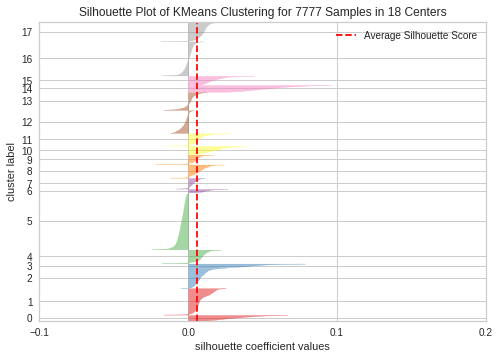

For n_clusters = 19, silhouette score is 0.004612323845889539


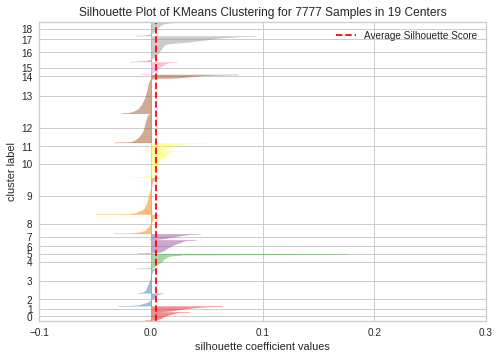

For n_clusters = 20, silhouette score is 0.007172076102780648


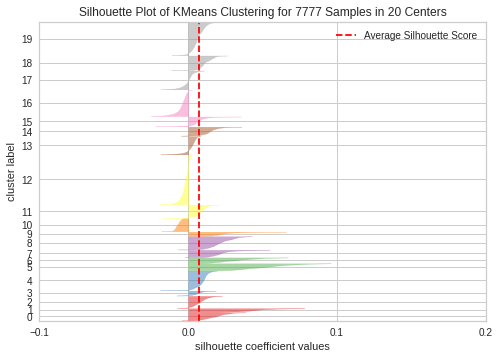

For n_clusters = 21, silhouette score is 0.006286290854096303


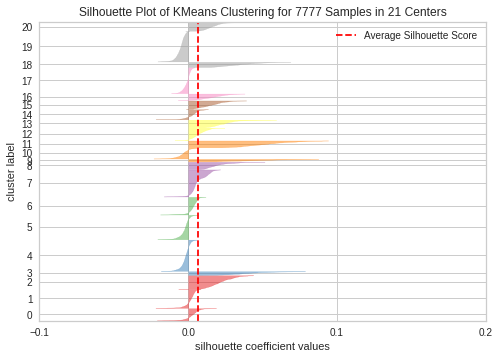

In [ ]:
silhouette_score_analysis(22)

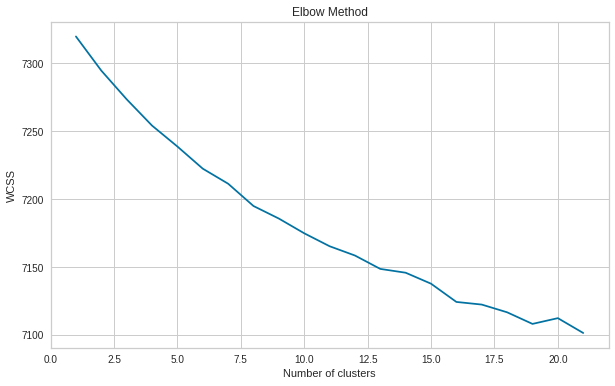

In [ ]:
# Elbow method to find the optimal value of k

wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
    
# Plot chart    
plt.figure(figsize=(10,6))
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

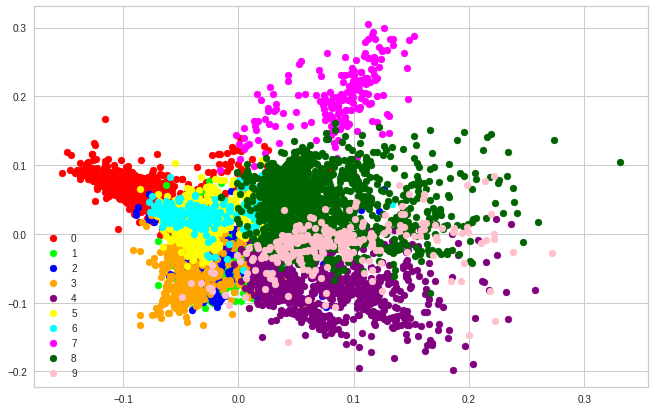

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm
kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

# Predict the labels of clusters
label = kmeans.fit_predict(X_transformed)

# Define a list of colors for each cluster (in this example, we use 8 colors)
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFA500', '#800080', '#FFFF00', '#00FFFF', '#FF00FF', '#006400', '#FFC0CB']

# Getting unique labels
unique_labels = np.unique(label)
 
# Plotting the results
plt.figure(figsize=(11,7))
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0], X_transformed[label == i , 1], c=colors[i], label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Word cloud for user rating review
def func_select_Category(category_name, df, column_of_choice):
  df_word_cloud = df[[column_of_choice]].dropna()
  df_word_cloud['kmeans_cluster'] = category_name
  df_word_cloud = df_word_cloud[df_word_cloud['kmeans_cluster']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])

  # Create stopword list:
  stopwords = set(STOPWORDS)

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {category_name}')
  plt.axis("off")
  plt.show()

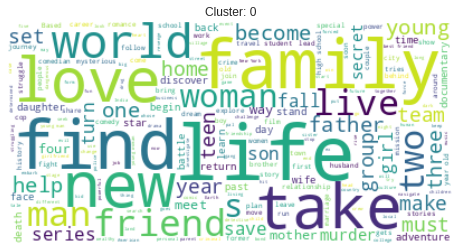

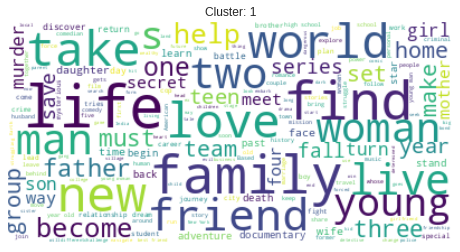

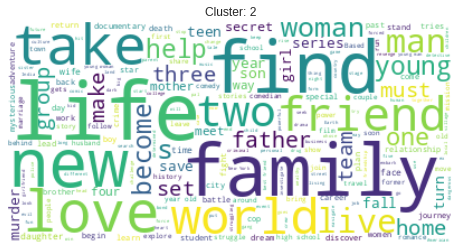

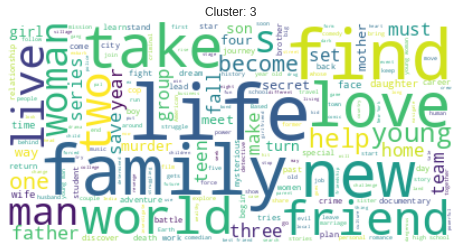

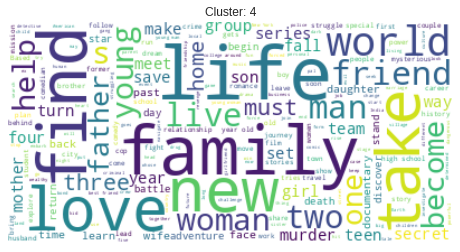

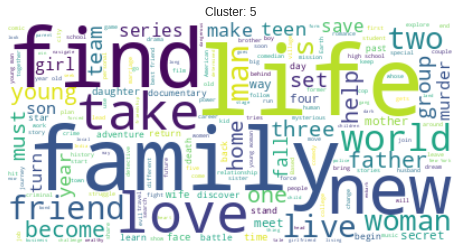

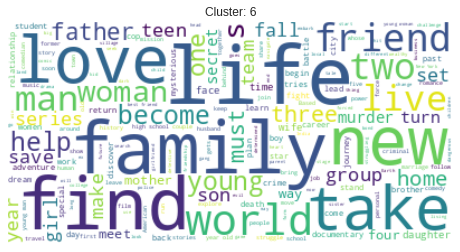

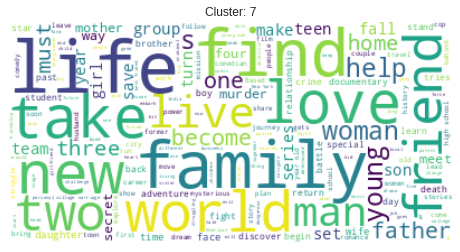

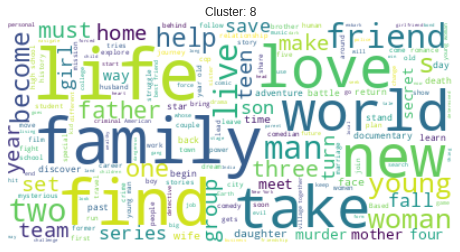

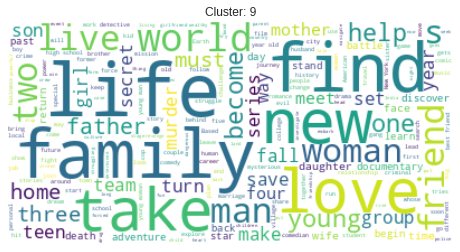

In [ ]:
for i in range(10):
  func_select_Category(i, df, 'description')

### ML Model - 2

###**Hierarchical clustering**

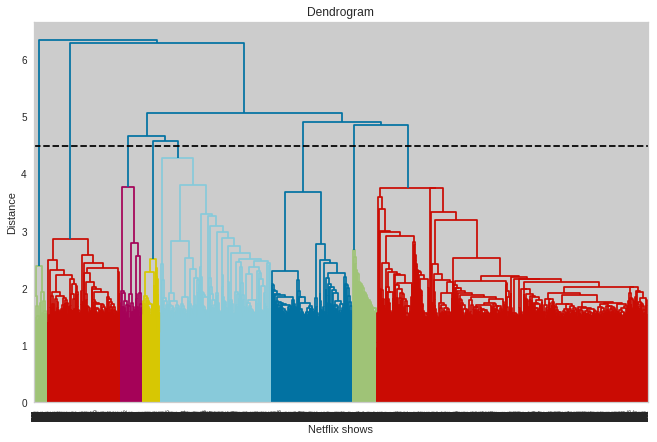

In [ ]:
# Compute the linkage matrix
Z = shc.linkage(X_transformed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(11,7))
plt.title('Dendrogram')
plt.xlabel('Netflix shows')
plt.ylabel('Distance')
shc.dendrogram(Z)
plt.axhline(y=4.5, color='black', linestyle='--')
plt.show()

**Observation:** At a distance of 4.5 units, 8 clusters can be built using the agglomerative clustering algorithm.

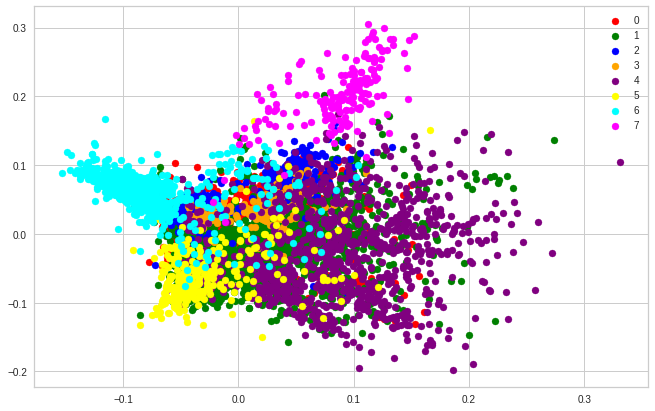

In [ ]:
# ML Model - 2 Implementation
# Fit the Algorithm
model = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
model.fit(X_transformed)

# Predict the labels of clusters
label = model.fit_predict(X_transformed)

# Define a list of colors for each cluster 
color_list = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

# Getting unique labels
unique_labels = np.unique(label)
 
# Plotting the results
plt.figure(figsize=(11,7))
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0], X_transformed[label == i , 1], c=color_list[i], label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe
df['hierarchical_cluster'] = model.labels_

In [ ]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_transformed, label)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.00282631759573305


In [ ]:
# Word cloud for user rating review
def func_select_Category(category_name, df, column_of_choice):
  df_word_cloud = df[[column_of_choice]].dropna()
  df_word_cloud['hierarchical_cluster'] = category_name
  df_word_cloud = df_word_cloud[df_word_cloud['hierarchical_cluster']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])

  # Create stopword list:
  stopwords = set(STOPWORDS)

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {category_name}')
  plt.axis("off")
  plt.show()

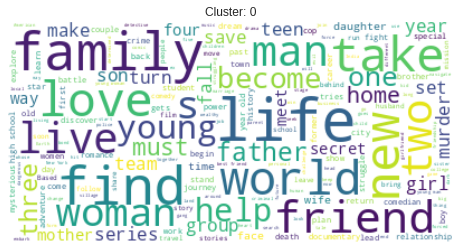

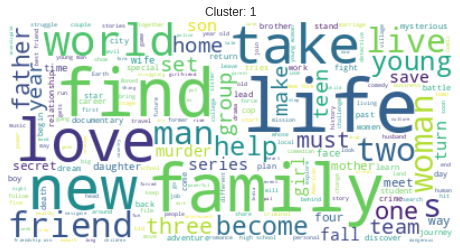

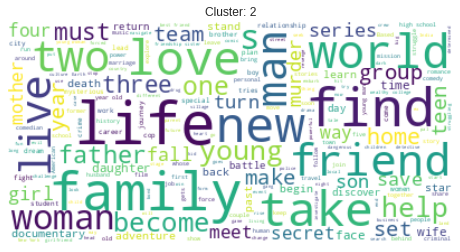

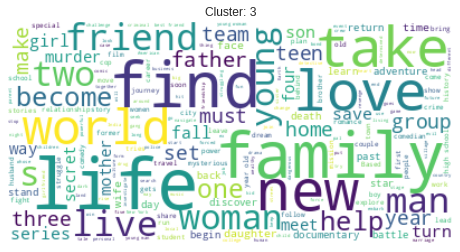

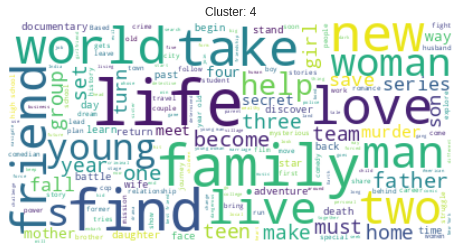

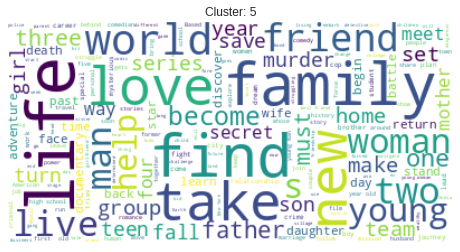

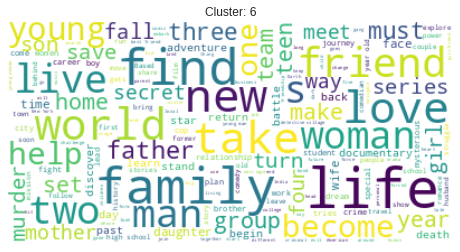

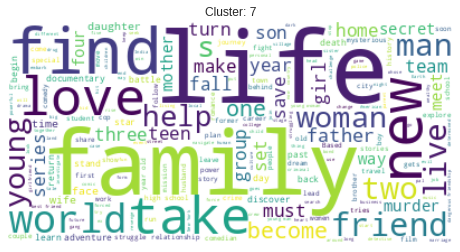

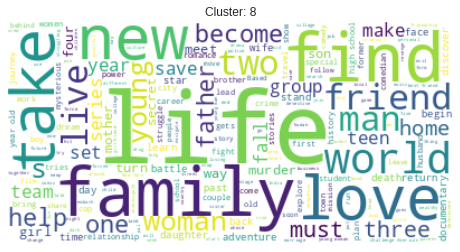

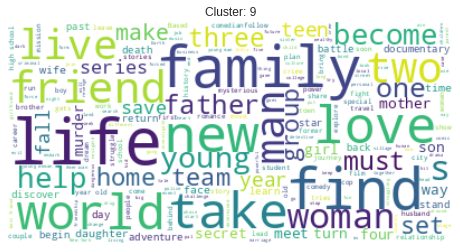

In [ ]:
for i in range(10):
  func_select_Category(i, df, 'description')

##**Content Based Recommendation System**

In [ ]:
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity

# Define a function to recommend movies
def recommend_movies(movie_title, X=X, data=cluster_df, k=5):
    # Find the index of the movie title in the dataframe
    idx = data.index.get_loc(movie_title)
    
    # Compute the cosine similarity between the selected movie and all other movies
    cosine_similarities = cosine_similarity(X[idx].reshape(1,-1), X).flatten()
    
    # Get the indices of the top-k most similar movies
    top_k_indices = cosine_similarities.argsort()[::-1][1:k+1]

    # Get the titles of the top-k most similar movies
    top_k_movies = [data.index[i] for i in top_k_indices]
    
    # Create a dataframe to store the results
    result_df = pd.DataFrame({'movie_title': top_k_movies})

    return result_df

In [ ]:
recommend_movies("Legend", X=X, data=cluster_df, k=10)

movie_title
0                                     The Bomb Squad
1                        Genius of the Ancient World
2                Dead in a Week (Or Your Money Back)
3                                              Locke
4                                            Poacher
5                                     The Perfection
6  The Crystal Calls Making the Dark Crystal: Age...
7                           The Theory of Everything
8                                         Drug Lords
9                         Genius of the Modern World

In [ ]:
recommend_movies("Lucifer", X=X, data=cluster_df, k=10)

movie_title
0               Rica, Famosa, Latina
1      Tom Segura: Completely Normal
2                        Girlfriends
3                          Spartacus
4                      Sister Cities
5                               Chef
6                     Forensic Files
7                Bottom of the World
8         Droppin' Cash: Los Angeles
9  Bean: The Ultimate Disaster Movie

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In evaluating clustering algorithms for a positive business impact, we considered the silhouette score as an evaluation metric. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. A high silhouette score indicates that data points are well-matched to their own cluster and poorly matched to neighboring clusters. By using the silhouette score as an evaluation metric, we can identify the clustering algorithm that produces the most well-defined and separated clusters, which can lead to better business decisions and outcomes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We chose KMeans clustering as our final prediction model because we found it to produce more well-defined and separated clusters than hierarchical clustering in our evaluation. We quantitatively measured the quality of the clustering results using the Within-Cluster Sum of Squares (WSSC) metric, which provides a measure of how compact the clusters are.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

As we used NLP techniques to analyze the text data, we did not use any model explainability tool. Instead, we applied dimensionality reduction techniques to identify the most important features in our model.

Specifically, we used techniques such as TF-IDF (Term Frequency-Inverse Document Frequency) and PCA (Principal Component Analysis) to reduce the dimensionality of our data and identify the most important features. TF-IDF assigns a weight to each term in the text data based on its frequency in the document and across the corpus, while PCA reduces the dimensionality of the data by identifying the most important components that capture the most variance in the text data.

By using these techniques, we were able to identify the most important features in our model and understand how they contribute to the overall performance of our model. This information can be used to further refine and optimize our model, leading to better predictions and insights.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

###**1.** It was interesting to discover that the majority of the content available on Netflix is in the form of movies.
###**2.** However, in recent years, Netflix has shifted its focus more towards TV shows.
###**3.** The vast majority of content on Netflix was released between 2010 and 2021.
###**4.** Most of this content tends to be released either towards the end or at the beginning of a year.
###**5.** Additionally, a large number of new titles are released on the first day of each month.
###**6.** Dramas and comedies have emerged as the most popular genres among Netflix viewers.
###**7.** United States and India are among the top five countries that produce content available on the platform.
###**8.** Six of the top ten actors with the most content available on Netflix are from India.
###**9.** The TV-MA rating is the most prevalent, suggesting that mature content is more popular among Netflix viewers.
###**10.** k=10 was found to be an optimal value for clusters using which we grouped our data into 10 distinct clusters.
###**11.** Using cosine_similarity, a simple recommendation system was developed from the available data, providing recommendations for both movies and TV shows.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***